Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Load the training, validation and test datasets into a dataframes 


In [2]:
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_val = pd.read_parquet('../data/processed/X_val.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet')
y_val = pd.read_parquet('../data/processed/y_val.parquet')
X_test = pd.read_parquet('../data/processed/X_test_scaled.parquet')

In [3]:
print('player_id' in X_train.columns)
print('player_id' in X_test.columns)
print ('player_id' in X_val.columns)

False
True
False


Remove 'player_id' from the test set

In [4]:
X_test_clean = X_test

In [5]:
X_test = X_test.drop(columns=['player_id'])

Train Polynomial Regression Model

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)

Import Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
poly_model = LogisticRegression(max_iter=10000, random_state=42)
poly_model.fit(X_train_poly, y_train)

C:\Users\shiri\AppData\Local\pypoetry\Cache\virtualenvs\kaggle1-nbadraft-JhF6N79V-py3.11\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, random_state=42)

In [10]:
y_train_pred_prob = poly_model.predict_proba(X_train_poly)[:, 1]

In [11]:
y_val_pred_prob = poly_model.predict_proba(X_val_poly)[:, 1]

Calculate AUROC on the training set

Import AUROC

In [12]:
from sklearn.metrics import roc_auc_score,roc_curve

In [13]:
train_auc = roc_auc_score(y_train, y_train_pred_prob)
print(f"poly_model Training AUROC: {train_auc}")

poly_model Training AUROC: 0.9970615427758976


In [14]:
val_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"poly_model Validation AUROC: {val_auc}")

poly_model Validation AUROC: 0.9871226521404485


Plot AUROC Curve

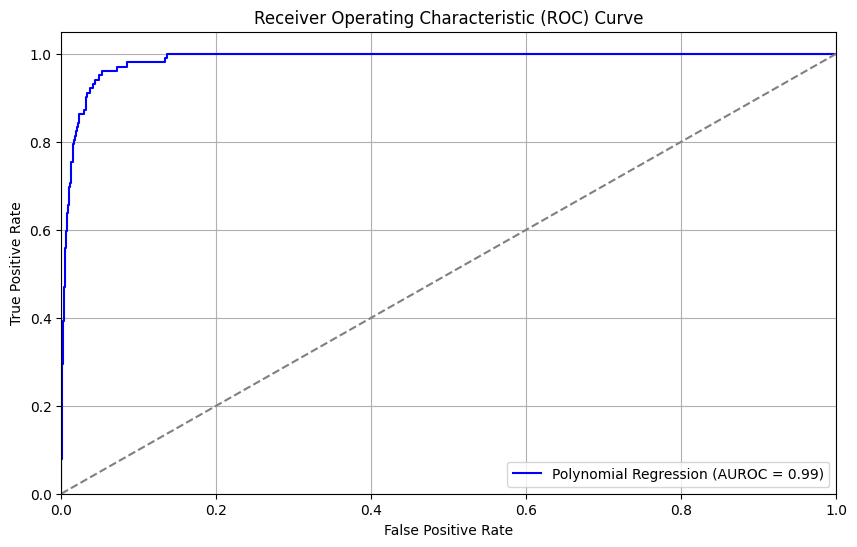

In [15]:
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Polynomial Regression (AUROC = {:.2f})'.format(val_auc))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [16]:
test_pred_prob = poly_model.predict_proba(X_test_poly)[:, 1]

Save the probability as CSV file

In [18]:
submission = pd.DataFrame({
    'player_id': X_test_clean['player_id'],
    'drafted': test_pred_prob
})

In [19]:
submission.to_csv('../data/external/sh-Poly_Results.csv', index=False)

save the model

Import dump from joblib

In [20]:
from joblib import dump

In [21]:
dump(poly_model, '../models/sh-Poly_Results.joblib')

['../models/sh-Poly_Results.joblib']